# Analyzing Correlation Between Cryptocurrency Prices and Stock Market Performance.
### Research Objective:
#### To explore the evolving relationship between Cryptocurrencies and Stocks. 

Datasets include: Crypto Prices (Bitcoin, Ethereum, Solana), Stock Prices (TSLA, APPLE, S&P 500).

# Import Required Libraries

In [271]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


# Load Crpto & Stocks Data

In [273]:
# Define ticker symbols
tickers = {
    'BTC': 'BTC-USD',
    'ETH': 'ETH-USD',
    'SOL': 'SOL-USD',
    'AAPL': 'AAPL',
    'TSLA': 'TSLA',
    'GSPC': '^GSPC'
}

# Download historical closing prices (daily data for the past 8 months)
data = yf.download(list(tickers.values()), period="8mo", interval="1d")['Close']

# Rename columns for clarity
data.columns = tickers.keys()
data.dropna(inplace=True)
data.tail()


[*********************100%***********************]  6 of 6 completed


,BTC,ETH,SOL,AAPL,TSLA,GSPC
Date,,,,,,
2025-06-23,201.500000,105577.773438,2421.824951,144.846725,348.679993,6025.169922
2025-06-24,200.300003,106045.632812,2448.008789,145.954529,340.470001,6092.180176
2025-06-25,201.559998,107361.257812,2419.310303,143.505127,327.549988,6092.160156
2025-06-26,201.000000,106960.000000,2416.146729,139.059860,325.779999,6141.020020
2025-06-27,201.080002,107088.429688,2423.866943,142.191483,323.630005,6173.069824


# Visualize Price Trends

In [275]:
# Normalize prices
normalized = data / data.iloc[0]

# Plot normalized prices using Plotly
fig_prices = go.Figure()
for col in normalized.columns:
    fig_prices.add_trace(go.Scatter(x=normalized.index, y=normalized[col], mode='lines', name=col))

# Create chart
fig_prices.update_layout(
    title="Normalized Price Trends (Start = 1)",
    xaxis_title="Date",
    yaxis_title="Normalized Price",
    hovermode="x unified"
)

fig_prices.show()


In [276]:
# Calculate daily percentage returns for each asset
returns = data.pct_change().dropna()
returns.tail()


,BTC,ETH,SOL,AAPL,TSLA,GSPC
Date,,,,,,
2025-06-23,0.002488,0.021955,0.006032,0.033375,0.082319,0.009607
2025-06-24,-0.005955,0.004431,0.010812,0.007648,-0.023546,0.011122
2025-06-25,0.006291,0.012406,-0.011723,-0.016782,-0.037948,-0.000003
2025-06-26,-0.002778,-0.003737,-0.001308,-0.030976,-0.005404,0.008020
2025-06-27,0.000398,0.001201,0.003195,0.022520,-0.006600,0.005219


In [277]:
# View correlation of returns
print(returns.corr())

           BTC       ETH       SOL      AAPL      TSLA      GSPC
BTC   1.000000  0.239821  0.359094  0.216242  0.541082  0.788622
ETH   0.239821  1.000000  0.778347  0.757211  0.556595  0.382467
SOL   0.359094  0.778347  1.000000  0.732690  0.560715  0.447660
AAPL  0.216242  0.757211  0.732690  1.000000  0.486298  0.376137
TSLA  0.541082  0.556595  0.560715  0.486298  1.000000  0.707484
GSPC  0.788622  0.382467  0.447660  0.376137  0.707484  1.000000


# Visualize Returns Plot - BTC vs TSLA vs GSPC

In [280]:
# Create chart
fig_btc_group = go.Figure()

# Add BTC daily returns
fig_btc_group.add_trace(go.Scatter(
    x=returns.index,
    y=returns['BTC'],
    mode='lines',
    name='BTC Returns',
    line=dict(color='orange')
))

# TSLA
fig_btc_group.add_trace(go.Scatter(
    x=returns.index,
    y=returns['TSLA'],
    mode='lines',
    name='TSLA Returns',
    line=dict(color='green')
))

# S&P 500
fig_btc_group.add_trace(go.Scatter(
    x=returns.index,
    y=returns['GSPC'],
    mode='lines',
    name='S&P 500 Returns (GSPC)',
    line=dict(color='blue')
))

# Customize layout – titles, axes
fig_btc_group.update_layout(
    title='Daily Returns: BTC vs TSLA vs S&P 500 (GSPC)',
    xaxis_title='Date',
    yaxis_title='Daily Return',
    hovermode='x unified',
    template='plotly_white'
)

fig_btc_group.show()


# Visualize Returns Plot - ETH vs SOL vs AAPL

In [282]:
# Create chart
fig_eth_group = go.Figure()

# Add Ethereum returns
fig_eth_group.add_trace(go.Scatter(
    x=returns.index,
    y=returns['ETH'],
    mode='lines',
    name='ETH Returns',
    line=dict(color='purple')
))

# Add Solana
fig_eth_group.add_trace(go.Scatter(
    x=returns.index,
    y=returns['SOL'],
    mode='lines',
    name='SOL Returns',
    line=dict(color='teal')
))

# Add AAPL
fig_eth_group.add_trace(go.Scatter(
    x=returns.index,
    y=returns['AAPL'],
    mode='lines',
    name='AAPL Returns',
    line=dict(color='gray')
))

# Customize layout – titles, axes
fig_eth_group.update_layout(
    title='Daily Returns: ETH vs SOL vs AAPL',
    xaxis_title='Date',
    yaxis_title='Daily Return',
    hovermode='x unified',
    template='plotly_white'
)

fig_eth_group.show()


# Visualize Correlation Matrices

In [284]:
# Install Plotly
!pip install plotly

import plotly.express as px

# Pearson heatmap
fig_pearson = px.imshow(
    returns.corr(method='pearson'),
    text_auto='.2f',
    color_continuous_scale='RdBu',
    title=" Pearson Correlation "
)
fig_pearson.show()

# Spearman heatmap
fig_spearman = px.imshow(
    returns.corr(method='spearman'),
    text_auto='.2f',
    color_continuous_scale='Viridis',  # Cool purple-green tones for variety
    title=" Spearman Correlation "
)
fig_spearman.show()



# Visualize 14-day Rolling Correlation

In [286]:
# 14-day rolling correlations
window = 14
rolling = pd.DataFrame({
    'Date': returns.index,
    'BTC vs TSLA': returns['BTC'].rolling(window).corr(returns['TSLA']),
    'BTC vs GSPC': returns['BTC'].rolling(window).corr(returns['GSPC']),
    'SOL VS AAPL': returns['SOL'].rolling(window).corr(returns['AAPL']),
    'ETH vs AAPL': returns['ETH'].rolling(window).corr(returns['AAPL']),
})

fig_roll = go.Figure()
for col in rolling.columns[1:]:
    fig_roll.add_trace(go.Scatter(x=rolling['Date'], y=rolling[col], mode='lines', name=col))

fig_roll.update_layout(
    title=f" {window}-Day Rolling Correlation (Interactive)",
    xaxis_title="Date",
    yaxis_title="Correlation",
    hovermode='x unified'
)
fig_roll.show()


/Users/taiwoariyo/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# Visualize Rolling Volatility of Crpto and Stocks

In [288]:
# Calculate rolling volatility (std dev of returns) with a 14-day window
window = 14
volatility = returns.rolling(window).std() * (252**0.5)  # Annualized volatility approx.

# Separate crypto and stock columns
crypto_cols = ['BTC', 'ETH', 'SOL']
stock_cols = ['AAPL', 'TSLA', 'GSPC']

# Plot Crypto Volatility
fig_crypto = go.Figure()
for col in crypto_cols:
    fig_crypto.add_trace(go.Scatter(
        x=volatility.index,
        y=volatility[col],
        mode='lines',
        name=col
    ))
fig_crypto.update_layout(
    title=f"Crypto Volatility (Annualized {window}-Day Rolling Std Dev)",
    xaxis_title="Date",
    yaxis_title="Volatility",
    hovermode="x unified"
)
fig_crypto.show()

# Plot Stock Volatility
fig_stock = go.Figure()
for col in stock_cols:
    fig_stock.add_trace(go.Scatter(
        x=volatility.index,
        y=volatility[col],
        mode='lines',
        name=col
    ))
fig_stock.update_layout(
    title=f"Stock Volatility (Annualized {window}-Day Rolling Std Dev)",
    xaxis_title="Date",
    yaxis_title="Volatility",
    hovermode="x unified"
)
fig_stock.show()


# Further Analysis - Granger Casuality Test

In [290]:
from statsmodels.tsa.stattools import grangercausalitytests
import io
import contextlib

def granger_test(df, cause, effect, maxlag=5):
    """
    Runs Granger causality test from `cause` → `effect` and returns p-values.
    """
    data = df[[effect, cause]].dropna()
    # Redirect stdout to suppress output
    with contextlib.redirect_stdout(io.StringIO()):
        result = grangercausalitytests(data, maxlag=maxlag)
    p_values = [round(result[i+1][0]['ssr_chi2test'][1], 4) for i in range(maxlag)]
    return p_values
    
def print_granger_summary(df, pairs, maxlag=5, alpha=0.05):
    """
    Prints Granger causality summary between given pairs of variables.
    
    pairs: list of tuples (cause, effect)
    """
    for cause, effect in pairs:
        pvals = granger_test(df, cause, effect, maxlag=maxlag)
        min_p = min(pvals)
        result = "YES" if min_p < alpha else "NO"
        print(f"{cause} → {effect} | p-values: {pvals} | Causality? {result}")

pairs_to_test = [('ETH', 'AAPL'),('ETH', 'TSLA'),('ETH', 'GSPC'),('SOL', 'TSLA'),('SOL', 'GSPC'),
    ('SOL', 'AAPL'),('GSPC', 'BTC'),('GSPC', 'ETH'),('GSPC', 'SOL'),('BTC', 'TSLA'),('BTC', 'AAPL'),
    ('BTC', 'GSPC'),('AAPL', 'ETH'),('AAPL', 'SOL'),('AAPL', 'BTC'),('TSLA', 'ETH'),('TSLA', 'SOL'),
    ('TSLA', 'BTC')
]

print_granger_summary(returns, pairs_to_test, maxlag=5, alpha=0.05)


ETH → AAPL | p-values: [0.7215, 0.9531, 0.3685, 0.3388, 0.2893] | Causality? NO
ETH → TSLA | p-values: [0.7333, 0.7938, 0.7079, 0.6748, 0.7713] | Causality? NO
ETH → GSPC | p-values: [0.8186, 0.4601, 0.1808, 0.319, 0.1393] | Causality? NO
SOL → TSLA | p-values: [0.1856, 0.3848, 0.1236, 0.0714, 0.1093] | Causality? NO
SOL → GSPC | p-values: [0.5429, 0.3156, 0.0258, 0.0184, 0.0049] | Causality? YES
SOL → AAPL | p-values: [0.6905, 0.4394, 0.33, 0.4404, 0.5408] | Causality? NO
GSPC → BTC | p-values: [0.1917, 0.1878, 0.1574, 0.1677, 0.1525] | Causality? NO
GSPC → ETH | p-values: [0.6168, 0.0481, 0.1104, 0.1569, 0.182] | Causality? YES
GSPC → SOL | p-values: [0.7695, 0.0836, 0.1076, 0.1611, 0.08] | Causality? NO
BTC → TSLA | p-values: [0.4273, 0.3792, 0.5902, 0.3057, 0.3574] | Causality? NO
BTC → AAPL | p-values: [0.0611, 0.0677, 0.0618, 0.0092, 0.0175] | Causality? YES
BTC → GSPC | p-values: [0.5386, 0.5957, 0.8347, 0.7556, 0.3846] | Causality? NO
AAPL → ETH | p-values: [0.3889, 0.6459, 0.0

# Visualize Granger Causality P-Values Heatmap

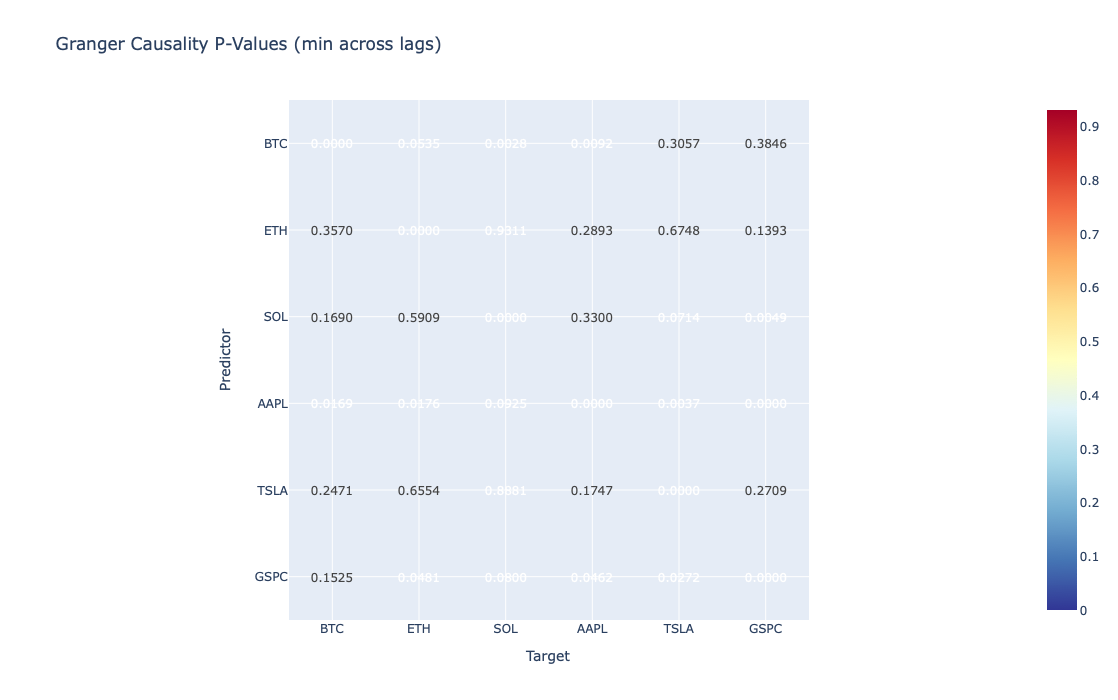

In [292]:
# List of assets and max lag
assets = returns.columns.tolist()
max_lag = 5

# DataFrame to store p-values
pvals_matrix = pd.DataFrame(index=assets, columns=assets)

# Run Granger causality test between each pair
for target in assets:
    for predictor in assets:
        if target != predictor:
            data = returns[[target, predictor]].dropna()
            with contextlib.redirect_stdout(io.StringIO()):
                result = grangercausalitytests(data, maxlag=max_lag)
            pvals = [round(result[i+1][0]['ssr_chi2test'][1], 4) for i in range(max_lag)]
            pvals_matrix.loc[predictor, target] = min(pvals)
        else:
            pvals_matrix.loc[predictor, target] = np.nan

# Convert to float
pvals_matrix = pvals_matrix.astype(float)

# Interactive heatmap
fig = px.imshow(
    pvals_matrix,
    text_auto=".4f",
    color_continuous_scale="RdYlBu_r",
    title="Granger Causality P-Values (min across lags)",
    labels={"x": "Target", "y": "Predictor"}
)
fig.update_layout(width=800, height=700)
fig.show()


# Visualize Cross-Correlation

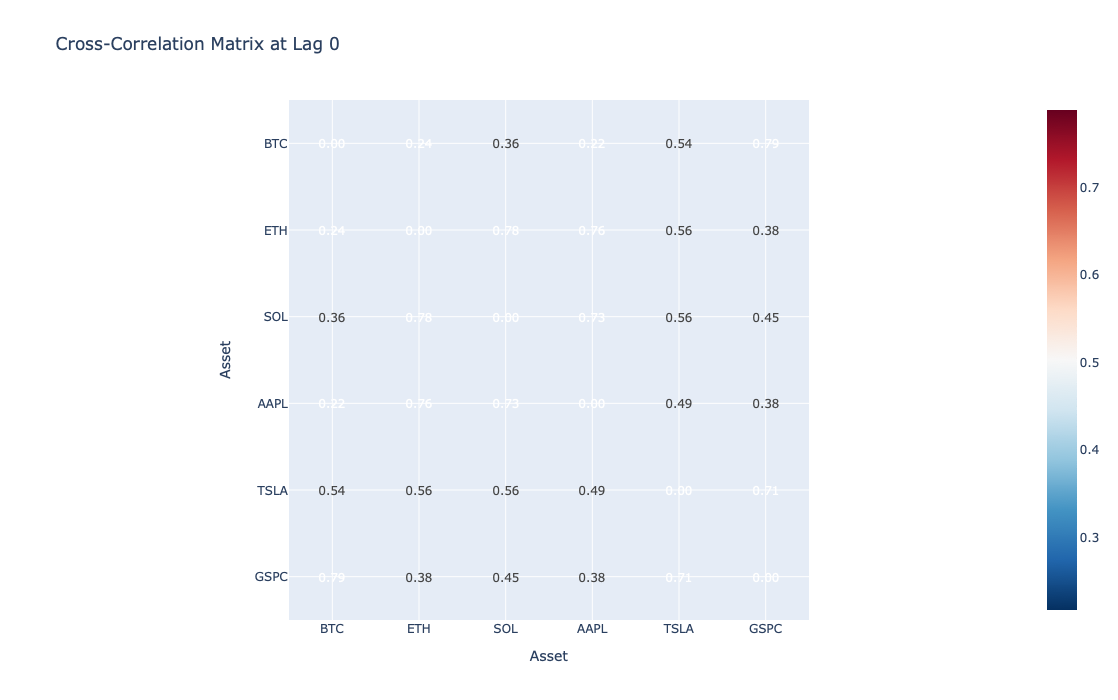

In [294]:
# Define assets
assets = returns.columns.tolist()
corr_matrix = pd.DataFrame(index=assets, columns=assets)

# Compute Pearson correlation matrix
for asset1 in assets:
    for asset2 in assets:
        if asset1 == asset2:
            corr_matrix.loc[asset1, asset2] = np.nan
        else:
            corr_matrix.loc[asset1, asset2] = returns[asset1].corr(returns[asset2])

corr_matrix = corr_matrix.astype(float)

# Plot interactive heatmap
fig = px.imshow(
    corr_matrix,
    text_auto=".2f",
    color_continuous_scale="RdBu_r",
    title="Cross-Correlation Matrix at Lag 0",
    labels={"x": "Asset", "y": "Asset"}
)
fig.update_layout(width=800, height=700)
fig.show()


## KEY TAKEAWAYS:

* BTC shows a strong correlation (0.79) with the S&P 500 (GSPC), and ETH correlates significantly with tech stocks like AAPL (0.76).
* ETH behaves increasingly like a tech asset, which aligns with Ethereum’s usage in decentralized finance and Web3 platforms often tied to tech innovation cycles.
* Crypto is not yet a perfect substitute for stocks, but short-term behavior suggests institutional overlap and shared macro exposure.

* Predictive Relationships:
* BTC → AAPL: Suggests BTC movements may precede or influence large-cap tech sentiment. Possibly driven by liquidity risk, macro investor behavior, or market-wide fear/greed dynamics.
* AAPL → ETH/BTC: Apple stock returns help forecast ETH and BTC, indicating that big tech market moves ripple into crypto (especially via sentiment or ETF-linked flows).
* GSPC → ETH: Indicates broad market trends may influence Ethereum returns — another sign of ETH becoming more institutionally sensitive.

* TSLA consistently exhibits the highest volatility, often over 100% annualized, with massive swings not matched by BTC or GSPC.

* Around April–May 2025, all assets (BTC, TSLA, GSPC, AAPL) experienced volatility spikes, indicating macro shocks.
* Crypto–Stock Market Integration Is Strengthening.